In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import molsim

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">

# Excersise 2: Boltzmann distribution

Consider a system of $N$ energy levels with energies $0, ε, 2ε, · · · , (N − 1) × ε$ and $ε > 0$.

<img src="./figure/boltzmann.png" alt="示例图片" style="display: block; margin: auto;" >


**Figure 1.A system of $N$ energy levels with energies $0,\epsilon,2\epsilon, \cdots ,\left(N-1\right)\times\epsilon$
 $\left(\epsilon>0\right)$.**

In a canonical ensemble for classical particles, the Boltzmann distribution in this case is the following equation:


$$
P_{i} = g_{i} \times exp(-E_{i}/k_{B}T)
$$

Where $g_{i}$ is the degeneracy of energy levels, i is the energy level, $E_{i}$ is its energy, $k_{B}$ is the Boltzmann constant. 

# Question 1:

Modify the problem and calculate the occupancy of each level for different values of the temperature when all levels are non-degenerate. You can consider $\epsilon = 1$ for convenience. What happens at high temperatures? (Note that the temperature $T$ is expressed in reduced units, that is, $k_B=1$).

</div>

---

### Answer
At higher temperatures we notice that the particles occupy all energy levels more evenly due to the added thermal energy

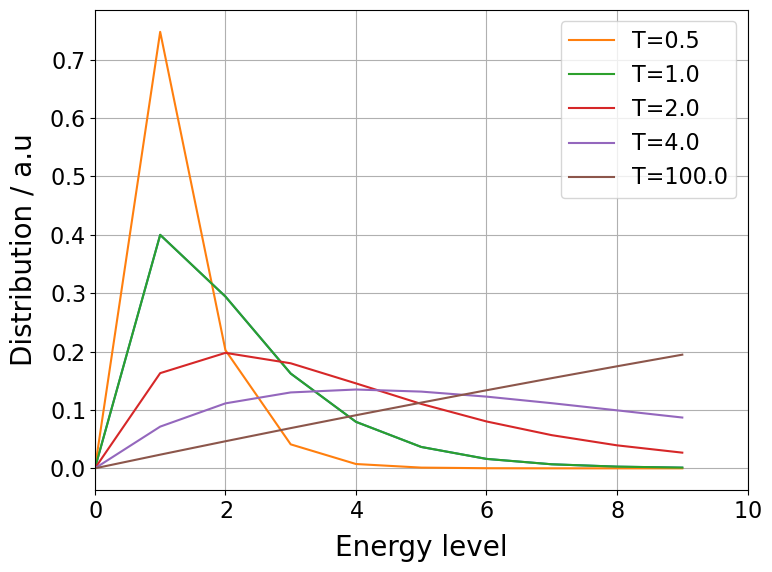

In [10]:
# list of temperatures
T = [0.5, 1.0, 2.0, 4.0, 100.0]

indices = np.arange(10, dtype=float)
epsilon = 1
energies = indices*epsilon
distributions = np.zeros((len(T), len(indices)), dtype=np.float64)


# start refactor
for i, temperature in enumerate(T):
    beta = -1/temperature
    partitionFunction = np.sum(indices*np.exp(beta*energies))
    distributions[i] = indices*np.exp(beta*energies)/partitionFunction
# end refactor

plt.plot(indices, distributions[1])
for i in range(len(T)):
    plt.plot(indices, distributions[i], label="T=%s" % (T[i]))
plt.xlabel("Energy level", fontsize=20)
plt.ylabel("Distribution / a.u", fontsize=20)
plt.xlim([0, len(indices)])
plt.legend()
plt.show()

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">

# Question 2:

Change the program in such a way that the degeneracy of energy
level $i$ equals $i+1$. What do you see?

</div>

---

### Answer

I noticed that the distributions shifted one to the left.

In [8]:
print(np.arange(10, dtype=float))

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


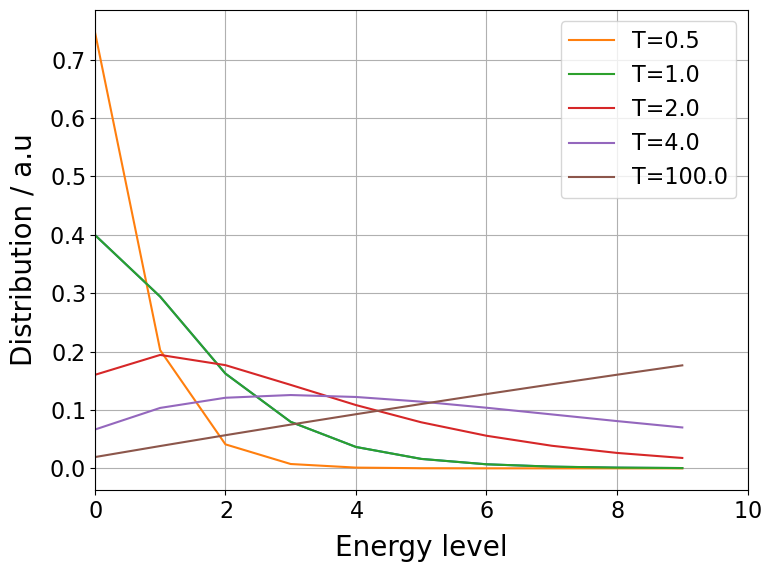

In [15]:
# list of temperatures
T = [0.5, 1.0, 2.0, 4.0, 100.0]

indices = np.arange(10, dtype=float)
epsilon = 1
energies = indices*epsilon
distributions = np.zeros((len(T), len(indices)), dtype=np.float64)
degeneracy = indices + 1

for i, temperature in enumerate(T):
    beta = -1/temperature
    partitionFunction = np.sum(degeneracy*np.exp(beta*energies))
    distributions[i] = degeneracy*np.exp(beta*energies)/partitionFunction


plt.plot(indices, distributions[1])
for i in range(len(T)):
    plt.plot(indices, distributions[i], label="T=%s" % (T[i]))
plt.xlabel("Energy level", fontsize=20)
plt.ylabel("Distribution / a.u", fontsize=20)
plt.xlim([0, len(indices)])
plt.legend()
plt.show()

<div style="max-width: 1000px; margin-left: 0; margin-right: auto; line-height: 1.6;">

<!-- ### Non-interacting $E_i = \frac{i(i+1)}{2}$ -->
<!-- The whole linear rotor with moment of inertia is kinda random to me, maybe rewrite question? -->
# Question 3:

i. Modify the program in such a way that the occupation of the energy levels as well as the partition function ($q$) is calculated for a linear rotor with moment of inertia $I$. 

for different temperatures. Note that the energy levels of a linear rotor are

\begin{equation}
U=J(J+1)\frac{\hbar^2}{2I}
\tag{5}
\end{equation}

with $J = 0,1,2,··· ,∞$. The degeneracy of level $J$ equals $2J +1$.

ii. Compare your result with the approximate result for different temperatures

\begin{equation}
q=\frac{2I}{\beta \hbar^2} \qquad
\frac{I}{\hbar^2}=1
\tag{4}
\end{equation}

</div>

[ 0.  1.  3.  6. 10. 15. 21. 28. 36. 45.]


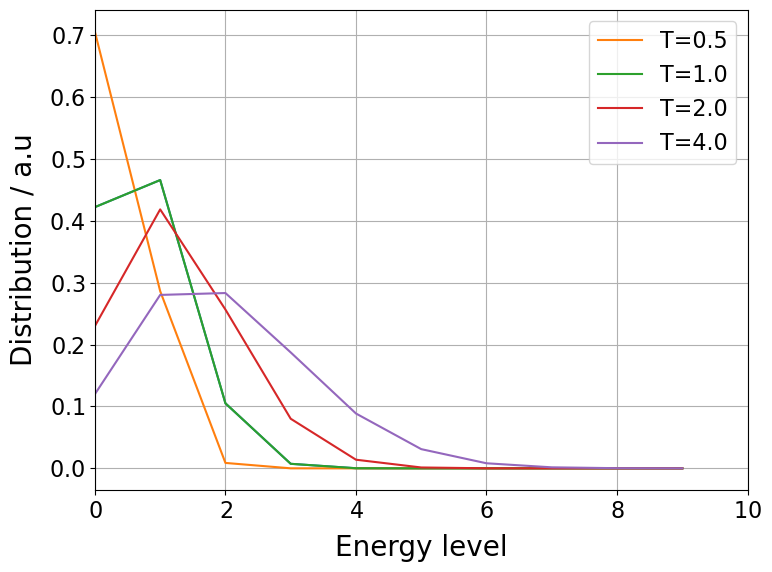

In [16]:
# list of tempratures
T = [0.5, 1.0, 2.0, 4.0]

#Levels
indices = np.arange(10, dtype=float)

#Actual energy of those levels
energies = 0.5 * indices * (indices + 1.0)

#Degeneracy of the energy levels
prefactor = 2.0 * indices + 1.0
print(energies)
distributions = np.zeros((len(T), len(indices)), dtype=np.float64)

for i, temperature in enumerate(T):
    beta = -1/temperature
    partitionFunction = np.sum(prefactor*np.exp(beta*energies))
    distributions[i] = prefactor*np.exp(beta*energies)/partitionFunction


plt.plot(indices, distributions[1])
for i in range(len(T)):
    plt.plot(indices, distributions[i], label="T=%s" % (T[i]))
plt.xlabel("Energy level", fontsize=20)
plt.ylabel("Distribution / a.u", fontsize=20)
plt.xlim([0, len(indices)])
plt.legend()
plt.show()